In [54]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [8]:
min(len(w) for w in words)

2

In [9]:
max(len(w) for w in words)

15

In [10]:
# in a bigram language model, we are always working with just two characters

In [18]:
# consecutive characters in the first 3 words (two at a time)
b = {} # counting each bigram in a dictionary
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>'] # adding 'start' and 'end' tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 #counting
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [23]:
# consecutive characters in the all words
b = {} # counting each bigram in a dictionary
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # adding 'start' and 'end' tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 #counting

In [28]:
# sorting most common to least common bigrams
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [47]:
# 26 alphabet letters + 2 special characters // Pytorch 2D array
N = torch.zeros((28,28), dtype=torch.int32)

In [64]:
# set of all sorted lowercase characters
chars = sorted(list(set(''.join(words))))
# string to integer mapping, offset by 1 to account for special character
stoi = {s:i+1 for i,s in enumerate(chars)}
# special character
stoi['.'] = 0
# integer to string mapping
itos = {i:s for s,i in stoi.items()}

In [65]:
# consecutive characters in the all words
for w in words:
    chs = ['.'] + list(w) + ['.'] # adding 'start' and 'end' tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        # mapping ch1/ch2 to their integers
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        # 2D array indexing
        N[i1, i2] += 1

(-0.5, 27.5, 27.5, -0.5)

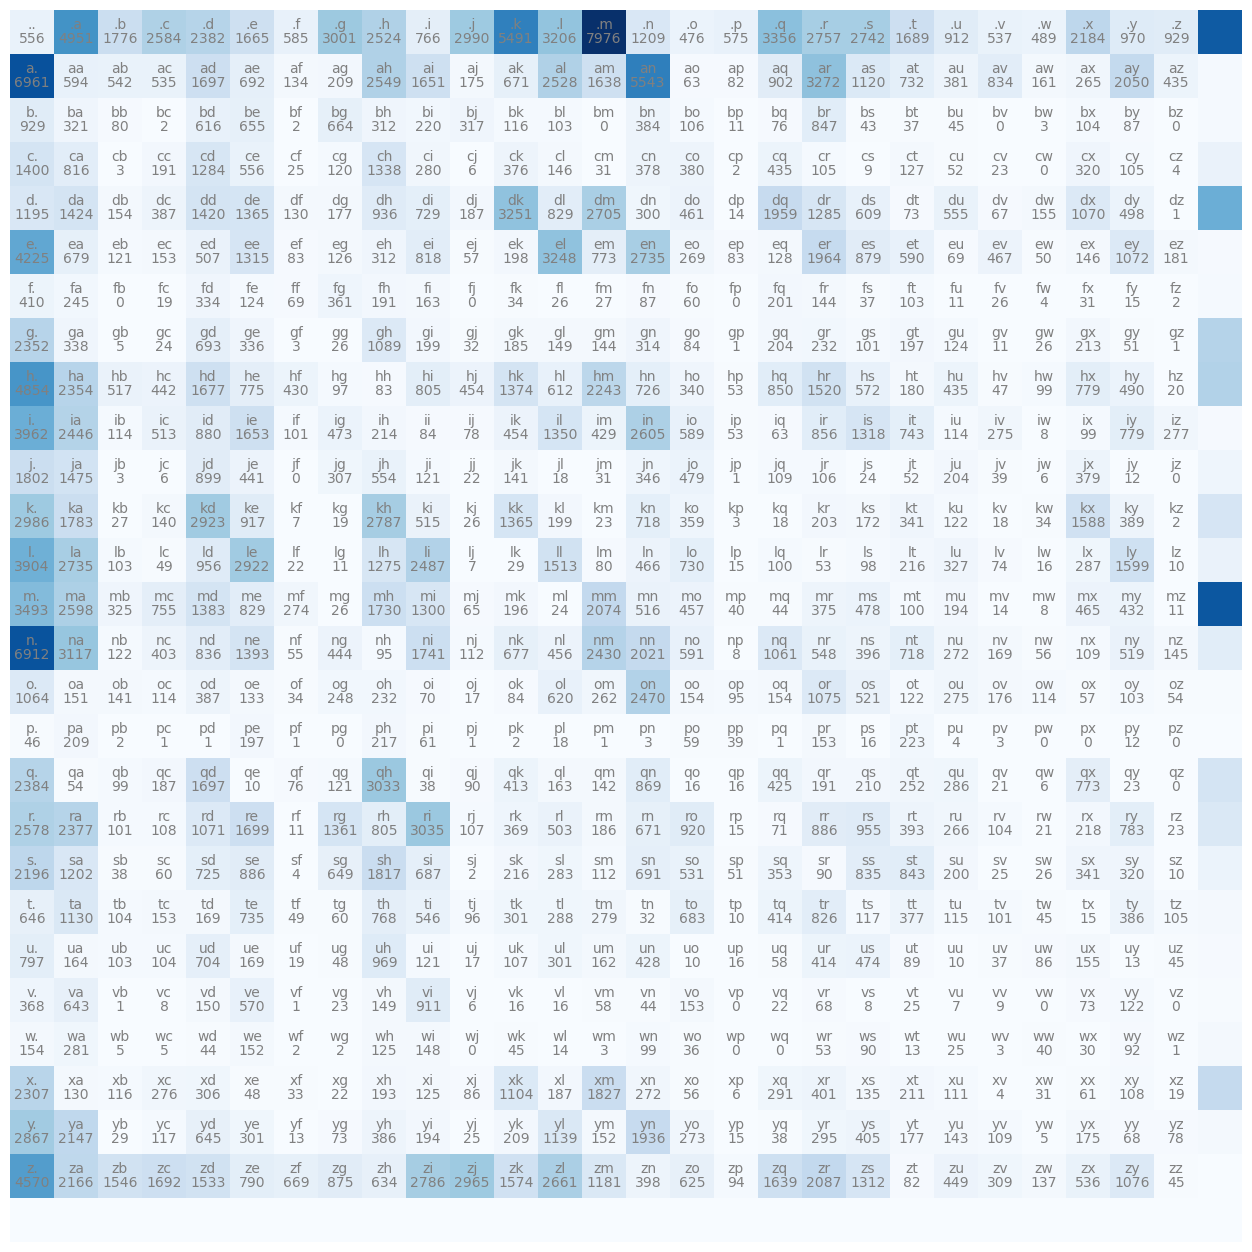

In [67]:
# visualizing the bigram tensor
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] # string representation of the bigram
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')
# first row shows counts for first letters
# first column shows counts for ending letters